In [22]:
pip install prophet

In [23]:
#import dependencies
import pandas as pd # Import pandas
from prophet import Prophet # Prophet modelling library

In [24]:
import pandas as pd

In [25]:
#load data
df = pd.read_csv(r'C:\Users\USER\Documents\teslasales.csv')

In [26]:
df.head()

,location,state,sold_date,sold_price
0,"Colma, CA",CA,8/31/2022,77600
1,"Rockville, MD",MD,8/31/2022,111200
2,"Marina Del Rey, CA",CA,8/31/2022,77100
3,"MECHANICSBURG, PA",PA,8/31/2022,91000
4,"Rockville, MD",MD,8/31/2022,88400


In [27]:
df.dtypes

location      object
state         object
sold_date     object
sold_price     int64
dtype: object

In [28]:
#apply data preprocessing
df['sold_date'] = pd.to_datetime(df['sold_date'])

In [29]:
frame = df[df['state'] == 'CA'].copy()

In [30]:
frame.drop('state', axis=1, inplace=True)

In [31]:
frame.drop('location', axis=1, inplace=True)

In [32]:
frame.head()

,sold_date,sold_price
0,2022-08-31,77600
2,2022-08-31,77100
33,2022-08-31,74200
35,2022-08-31,59000
37,2022-08-31,60000


In [33]:
#sold_date as ds, and sold_price as y
frame.columns = ['ds', 'y']

In [34]:
frame.head()

,ds,y
0,2022-08-31,77600
2,2022-08-31,77100
33,2022-08-31,74200
35,2022-08-31,59000
37,2022-08-31,60000


In [35]:
#create time series model
m = Prophet(interval_width=0.95) 

In [36]:
training_run = m.fit(frame)

14:40:56 - cmdstanpy - INFO - Chain [1] start processing
14:40:56 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
#evaluate model
future = m.make_future_dataframe(periods=400, freq='D')

In [38]:
forecast = m.predict(future)

In [39]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-01,66811.623200,27017.157380,113446.752218,66811.623200,66811.623200,4802.581653,4802.581653,4802.581653,4802.581653,4802.581653,4802.581653,0.0,0.0,0.0,71614.204853
1,2022-08-02,66920.519150,28090.765355,112289.385006,66920.519150,66920.519150,4436.555966,4436.555966,4436.555966,4436.555966,4436.555966,4436.555966,0.0,0.0,0.0,71357.075116
2,2022-08-03,67029.415099,21422.844902,108429.832665,67029.415099,67029.415099,-1631.751217,-1631.751217,-1631.751217,-1631.751217,-1631.751217,-1631.751217,0.0,0.0,0.0,65397.663883
3,2022-08-04,67138.311116,26062.948332,112815.999018,67138.311116,67138.311116,2506.581712,2506.581712,2506.581712,2506.581712,2506.581712,2506.581712,0.0,0.0,0.0,69644.892828
4,2022-08-05,67247.207097,23690.582826,111211.121907,67247.207097,67247.207097,-662.836850,-662.836850,-662.836850,-662.836850,-662.836850,-662.836850,0.0,0.0,0.0,66584.370247


C:\Users\USER\Downloads\anaconda\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\USER\Downloads\anaconda\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


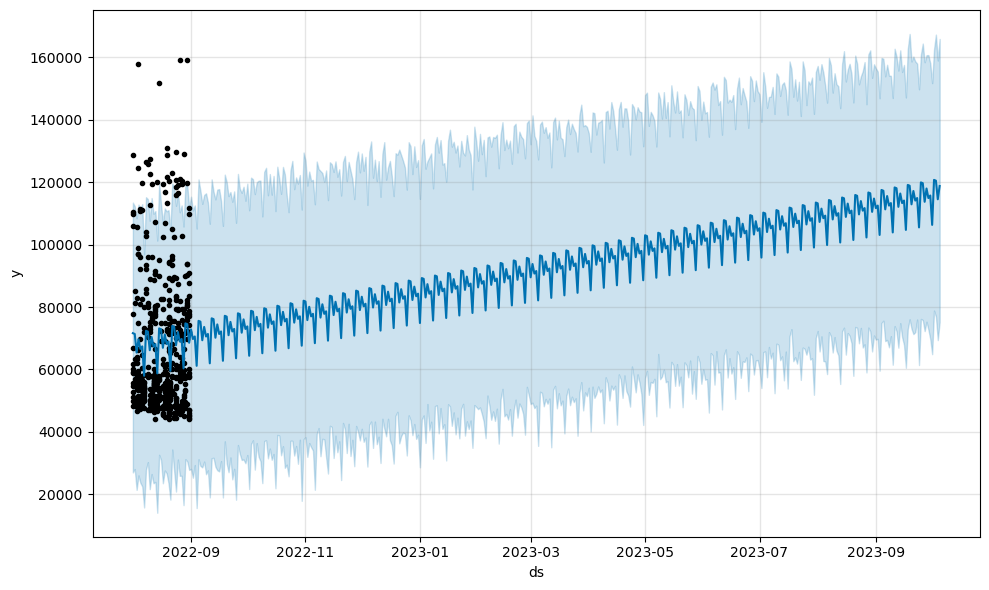

In [40]:
plot1 = m.plot(forecast)

C:\Users\USER\Downloads\anaconda\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


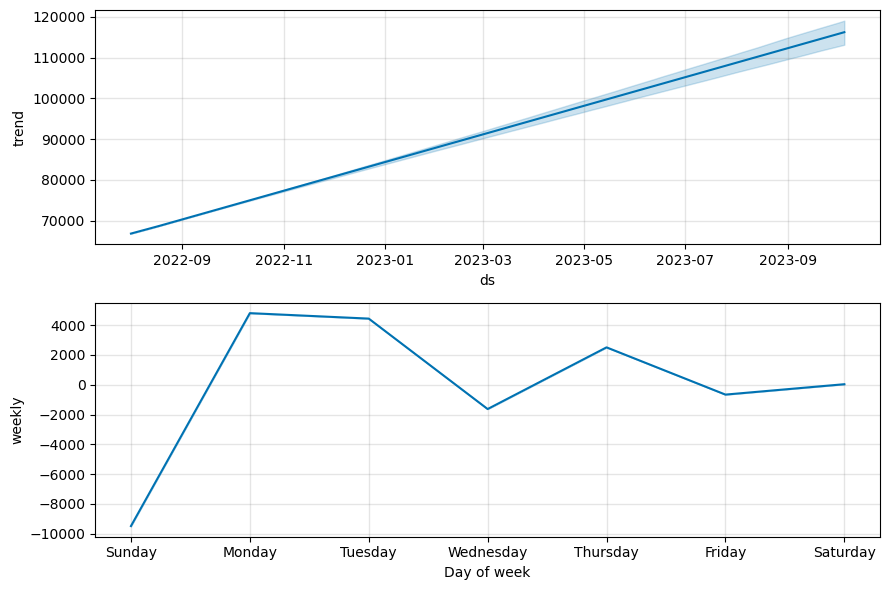

In [41]:
plot2 = m.plot_components(forecast)


In [42]:
# bonus round - scaling up
lines = df['state'].unique()

In [11]:
df[df['state']=='CA']

,location,state,sold_date,sold_price
0,"Colma, CA",CA,2022-08-31,77600
2,"Marina Del Rey, CA",CA,2022-08-31,77100
33,"Irvine, CA",CA,2022-08-31,74200
35,"OCEANSIDE, CA",CA,2022-08-31,59000
37,"Irvine, CA",CA,2022-08-31,60000
...,...,...,...,...
1572,"Colma, CA",CA,2022-08-01,110300
1573,"Stockton, CA",CA,2022-08-01,58800
1575,"Colma, CA",CA,2022-08-01,54800
1576,"Lathrop, CA",CA,2022-08-01,49800


In [12]:
for stock_line in lines: 
    frame = df[df['state'] == stock_line].copy()
    print(frame.tail())

          location state  sold_date  sold_price
1572     Colma, CA    CA 2022-08-01      110300
1573  Stockton, CA    CA 2022-08-01       58800
1575     Colma, CA    CA 2022-08-01       54800
1576   Lathrop, CA    CA 2022-08-01       49800
1577     Colma, CA    CA 2022-08-01       48400
              location state  sold_date  sold_price
1526     Rockville, MD    MD 2022-08-01       66300
1529     Rockville, MD    MD 2022-08-01       78700
1531  Owings Mills, MD    MD 2022-08-01      114800
1533     Rockville, MD    MD 2022-08-01      102200
1539     Rockville, MD    MD 2022-08-01       55600
                 location state  sold_date  sold_price
1527  King of Prussia, PA    PA 2022-08-01       82700
1534    MECHANICSBURG, PA    PA 2022-08-01       51700
1535            Devon, PA    PA 2022-08-01       60800
1536    MECHANICSBURG, PA    PA 2022-08-01       50600
1538    MECHANICSBURG, PA    PA 2022-08-01       48300
     location state  sold_date  sold_price
6         NaN    RI 2022-08

In [13]:
lines

array(['CA', 'MD', 'PA', 'RI', 'NJ', 'GA', 'NC', 'IL', 'OH', 'TX', 'AZ',
       'MN', 'CO', 'WA', 'OR', 'FL', 'DE', 'NY', 'MA', 'UT', 'MO', 'VA',
       'IN', 'TN', 'NV', nan], dtype=object)

In [14]:
fit_models = {}
for stock_line in lines:
    m = Prophet(interval_width=0.95)
    frame = df[df['state'] == stock_line].copy()
    frame.drop('state', axis=1, inplace=True)
    frame.drop('location', axis=1, inplace=True)
    frame.columns = ['ds', 'y']

    # Check if frame has at least two non-null rows
    if frame['y'].count() >= 2:
        model = m.fit(frame)
        fit_models[stock_line] = m
    else:
        print(f"Skipping {stock_line}: Not enough data points.")

14:35:07 - cmdstanpy - INFO - Chain [1] start processing
14:35:10 - cmdstanpy - INFO - Chain [1] done processing
14:35:10 - cmdstanpy - INFO - Chain [1] start processing
14:35:10 - cmdstanpy - INFO - Chain [1] done processing
14:35:11 - cmdstanpy - INFO - Chain [1] start processing
14:35:11 - cmdstanpy - INFO - Chain [1] done processing
14:35:11 - cmdstanpy - INFO - Chain [1] start processing
14:35:11 - cmdstanpy - INFO - Chain [1] done processing
14:35:12 - cmdstanpy - INFO - Chain [1] start processing
14:35:12 - cmdstanpy - INFO - Chain [1] done processing
14:35:12 - cmdstanpy - INFO - Chain [1] start processing
14:35:13 - cmdstanpy - INFO - Chain [1] done processing
14:35:13 - cmdstanpy - INFO - Chain [1] start processing
14:35:13 - cmdstanpy - INFO - Chain [1] done processing
14:35:14 - cmdstanpy - INFO - Chain [1] start processing
14:35:14 - cmdstanpy - INFO - Chain [1] done processing
14:35:14 - cmdstanpy - INFO - Chain [1] start processing
14:35:14 - cmdstanpy - INFO - Chain [1]

Skipping nan: Not enough data points.


In [15]:
fit_models

{'CA': <prophet.forecaster.Prophet at 0x1d3ba7f7b10>,
 'MD': <prophet.forecaster.Prophet at 0x1d3ba66f2d0>,
 'PA': <prophet.forecaster.Prophet at 0x1d3ba33b550>,
 'RI': <prophet.forecaster.Prophet at 0x1d3ba7fa1d0>,
 'NJ': <prophet.forecaster.Prophet at 0x1d3ba8403d0>,
 'GA': <prophet.forecaster.Prophet at 0x1d3b98b4050>,
 'NC': <prophet.forecaster.Prophet at 0x1d3ba7f5f90>,
 'IL': <prophet.forecaster.Prophet at 0x1d3ba865950>,
 'OH': <prophet.forecaster.Prophet at 0x1d3ba80cb50>,
 'TX': <prophet.forecaster.Prophet at 0x1d3ba7eb0d0>,
 'AZ': <prophet.forecaster.Prophet at 0x1d3ba862b10>,
 'MN': <prophet.forecaster.Prophet at 0x1d3ba7fb210>,
 'CO': <prophet.forecaster.Prophet at 0x1d3ba84b410>,
 'WA': <prophet.forecaster.Prophet at 0x1d3ba7e8810>,
 'OR': <prophet.forecaster.Prophet at 0x1d3ba89e9d0>,
 'FL': <prophet.forecaster.Prophet at 0x1d3ba8cd3d0>,
 'DE': <prophet.forecaster.Prophet at 0x1d3b9d42410>,
 'NY': <prophet.forecaster.Prophet at 0x1d3ba41cb90>,
 'MA': <prophet.forecaster.P

In [16]:
forward = fit_models['CA'].make_future_dataframe(200)
forecast = fit_models['CA'].predict(forward)

In [17]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-01,66811.623200,26436.490147,114349.727700,66811.623200,66811.623200,4802.581653,4802.581653,4802.581653,4802.581653,4802.581653,4802.581653,0.0,0.0,0.0,71614.204853
1,2022-08-02,66920.519150,27305.408064,117350.532353,66920.519150,66920.519150,4436.555966,4436.555966,4436.555966,4436.555966,4436.555966,4436.555966,0.0,0.0,0.0,71357.075116
2,2022-08-03,67029.415099,22475.913144,109160.859832,67029.415099,67029.415099,-1631.751217,-1631.751217,-1631.751217,-1631.751217,-1631.751217,-1631.751217,0.0,0.0,0.0,65397.663883
3,2022-08-04,67138.311116,28066.353605,116172.242920,67138.311116,67138.311116,2506.581712,2506.581712,2506.581712,2506.581712,2506.581712,2506.581712,0.0,0.0,0.0,69644.892828
4,2022-08-05,67247.207097,23683.636894,108757.338439,67247.207097,67247.207097,-662.836850,-662.836850,-662.836850,-662.836850,-662.836850,-662.836850,0.0,0.0,0.0,66584.370247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2023-03-15,92754.807158,50038.330813,135430.155144,91780.236186,93709.737567,-1631.751217,-1631.751217,-1631.751217,-1631.751217,-1631.751217,-1631.751217,0.0,0.0,0.0,91123.055941
227,2023-03-16,92869.974142,54332.333742,142282.966756,91888.427332,93835.297305,2506.581712,2506.581712,2506.581712,2506.581712,2506.581712,2506.581712,0.0,0.0,0.0,95376.555854
228,2023-03-17,92985.141125,50050.359458,137813.496640,91996.580151,93960.899764,-662.836850,-662.836850,-662.836850,-662.836850,-662.836850,-662.836850,0.0,0.0,0.0,92322.304275
229,2023-03-18,93100.308109,50457.811652,137562.822620,92101.103231,94086.229487,34.130718,34.130718,34.130718,34.130718,34.130718,34.130718,0.0,0.0,0.0,93134.438827
